# Implementing Generative Adversarial Network on MNIST dataset

<b>Import required libraries<b/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<b>Load MNIST<b/>

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

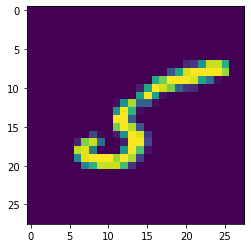

In [4]:
plt.imshow(X_train[11])

In [5]:
y_train[11]

5

In [6]:
X_train[11].shape

(28, 28)

<b>Filter Data<b/>

In [7]:
y_train ==8

array([False, False, False, ..., False, False,  True])

In [8]:
only_eight = X_train[y_train==8]

In [9]:
only_eight.shape

(5851, 28, 28)

In [10]:
X_train.shape

(60000, 28, 28)

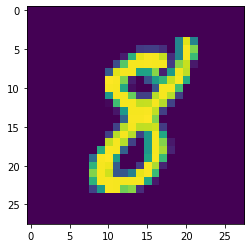

In [11]:
plt.imshow(only_eight[2])

<b>Create Generator & Discriminator<b/>

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten

In [13]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))

#Final output layer
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [14]:
#Choose a coding size, for 784 size we will choose around 100
coding_size = 100

In [15]:
generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[coding_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))

generator.add(Reshape([28,28]))
#We dont compile the generator compared to the discriminator

In [16]:
GAN = Sequential([generator,discriminator])

In [17]:
discriminator.trainable=False
#Discriminator should not be trained in the 2nd Phase

In [18]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

<b>Create Training Batches<b>

In [19]:
#Choose a smaller batch size for slow training
batch_size = 32

In [21]:
my_data = only_eight
type(my_data)

numpy.ndarray

In [22]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [23]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [24]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

<b>Check for details of GAN layers and model summary<b>

In [25]:
epochs = 1

In [26]:
GAN

In [27]:
GAN.layers

In [28]:
GAN.layers[0].layers

In [29]:
GAN.layers[1].layers

In [30]:
GAN.layers[0].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [31]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


In [32]:
# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################
        
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, coding_size])
        
        # Generate numbers based just on noise input
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        # This gets rid of a Keras warning
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        ## TRAINING THE GENERATOR     ######
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, coding_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        
        # Avois a warning
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
	Currently on batch number 100 of 182
TRAINING COMPLETE


In [33]:
noise =  tf.random.normal(shape=[10,coding_size])

In [34]:
noise.shape

TensorShape([10, 100])

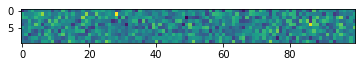

In [35]:
plt.imshow(noise)

In [36]:
images = generator(noise)
images.shape

TensorShape([10, 28, 28])

In [37]:
images[0]

<tf.Tensor: id=72382, shape=(28, 28), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.

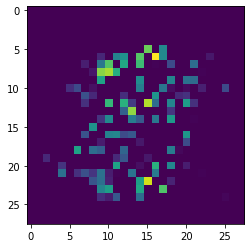

In [38]:
plt.imshow(images[0])

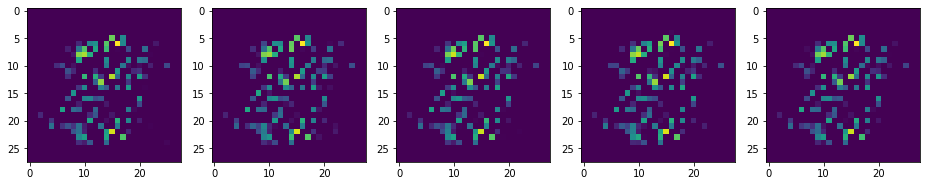

In [44]:
plt.figure(figsize=(16,16))

plt.subplot(1,5,1)
plt.imshow(images[0])
plt.subplot(1,5,2)
plt.imshow(images[2])
plt.subplot(1,5,3)
plt.imshow(images[4])
plt.subplot(1,5,4)
plt.imshow(images[6])
plt.subplot(1,5,5)
plt.imshow(images[8])
